In [1]:
import os;
import sys;
import math
import json
import random
import numpy as np;
import cv2;
import matplotlib.pyplot as plt;



In [2]:
trainData= "./public_data/trainData";
trainDataList = os.listdir(trainData);

testData = "./public_data/testData";
testDataList = os.listdir(testData);

In [3]:
trainDataList

['DSS-2018-28-083_2',
 'DSS-2018-28-002_1',
 'DSS-2018-28-002_2',
 'DSS-2018-28-002_5',
 'DSS-2018-28-079_1',
 'DSS-2018-28-016_1',
 'DSS-2018-28-013_13',
 'DSS-2018-28-005_3',
 'DSS-2018-28-079_5',
 'DSS-2018-28-013_10',
 'DSS-2018-28-016_8',
 'DSS-2018-28-005_1',
 'DSS-2018-28-077_1',
 'DSS-2018-28-013_a1']

In [4]:
testDataList

['DSS-2018-28-021_a3',
 'DSS-2018-28-010_b4',
 'DSS-2018-28-081_a2',
 'DSS-2018-28-012_a1',
 'DSS-2018-28-017_a1',
 'DSS-2018-28-079_b3',
 'DSS-2018-28-075_a1',
 'DSS-2018-28-016_b1',
 'DSS-2018-28-002_b4',
 'DSS-2018-28-012_a2',
 'DSS-2018-28-010_b2',
 'DSS-2018-28-022_b1',
 'DSS-2018-28-019_b2',
 'DSS-2018-28-079_a2',
 'DSS-2018-28-003_a3',
 'DSS-2018-28-001_b2',
 'DSS-2018-28-001_a1',
 'DSS-2018-28-077_a1',
 'DSS-2018-28-077_b5',
 'DSS-2018-28-075_b3',
 'DSS-2018-28-011_b2',
 'DSS-2018-28-011_b1',
 'DSS-2018-28-009_a2',
 'DSS-2018-28-009_b1',
 'DSS-2018-28-074_b3',
 'DSS-2018-28-011_a2',
 'DSS-2018-28-083_b2',
 'DSS-2018-28-079_b1',
 'DSS-2018-28-074_b1',
 'DSS-2018-28-079_b4',
 'DSS-2018-28-019_b3',
 'DSS-2018-28-022_a3',
 'DSS-2018-28-012_b3',
 'DSS-2018-28-016_b4',
 'DSS-2018-28-021_a1',
 'DSS-2018-28-010_b1',
 'DSS-2018-28-022_b3',
 'DSS-2018-28-013_a2',
 'DSS-2018-28-005_a3',
 'DSS-2018-28-077_b3',
 'DSS-2018-28-009_a3',
 'DSS-2018-28-079_a3',
 'DSS-2018-28-009_a1',
 'DSS-2018-

In [5]:
file = random.choice(trainDataList)
filepath = trainData+"/"+file;

In [6]:
filepath

'./public_data/trainData/DSS-2018-28-013_a1'

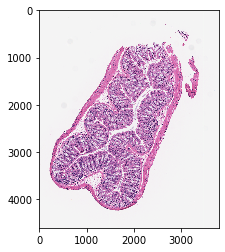

In [7]:
img = filepath+"/crop.png";
img = cv2.imread(img);
plt.imshow(img)

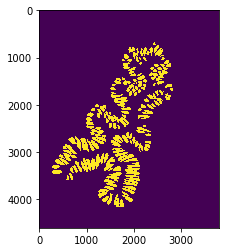

In [8]:
mask = filepath+"/gland_anno.json";

anno=[];


mask= json.load(open(mask) );
for i in mask:
    coor=mask[i]["coors"];
    coor = [np.asarray(x) for x in coor];
    anno.append(np.asarray(coor));

anno = np.asarray(anno);
mask = np.zeros((img.shape[0],img.shape[1]))

for a in anno:
    mask=cv2.fillPoly(mask, np.asarray([a]), 1);

plt.imshow(mask)

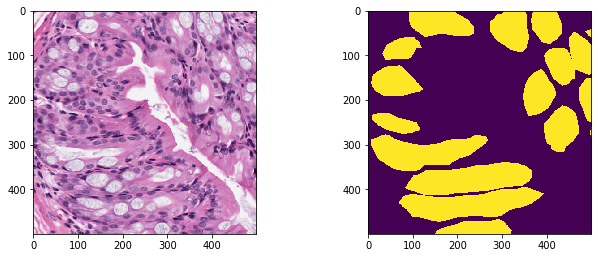

In [9]:
#zoom

fig = plt.figure(figsize=(10,10));
fig.subplots_adjust(hspace=0.5,wspace=0.5)
ax = fig.add_subplot(1,2,1)
ax.imshow(img[1500:2000,1500:2000,:])
ax = fig.add_subplot(1,2,2);
ax.imshow(mask[1500:2000,1500:2000])